# **In this notebook, we'll try to validate the results found in the 2023 dashboard given in the bibliography**

In [2]:
import polars as pl
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

## Loading the data

In [ ]:


DATA_2023 = []
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
start_time = time.time()
for month in months:
     
    DATA_2023.append(pl.read_csv("D:\\projet s8 files\\A2023\\A2023{}.csv".format(month), separator=';', ignore_errors=True, columns=['AGE_BEN_SNDS', 'ASU_NAT', 'BEN_SEX_COD', 'CPT_ENV_TYP', 'FLT_PAI_MNT', 'FLT_REM_MNT', 'PRS_REM_TYP', 'PRS_REM_MNT', 'PRS_NAT']))
    print("A2023{}.csv has been loaded".format(month))
end_time = time.time()
print("The time needed for the loading of the data is : {}s".format(end_time-start_time))

A202301.csv has been loaded
A202302.csv has been loaded
A202303.csv has been loaded
A202304.csv has been loaded
A202305.csv has been loaded
A202306.csv has been loaded
A202307.csv has been loaded
A202308.csv has been loaded
A202309.csv has been loaded
A202310.csv has been loaded
A202311.csv has been loaded
A202312.csv has been loaded
The time needed for the loading of the data is : 191.1929886341095s


La liste des codes d'actes liées aux transports et aux taxis

In [2]:
transport_codes = [
    4203,  # SUPPLEMENT TRANSPORT PERSONNE MOBILITE REDUITE
    4204,  # FORFAIT TRANSPORT URGENCE EXTRAMUROS CPAM MEUSE
    4205,  # FORFAIT TRANSPORT URGENCE INTRAMUROS CPAM MEUSE
    4206,  # PRESTATION FIN DE GARDE AMBULANCE
    4207,  # FORFAIT TRANSPORT D'URGENCE EXPERIMENTATION CPAM AUDE
    4208,  # FORFAIT D'URGENCE SUR APPEL DU SAMU EXPERIMENTATION CPAM BOUCHES-DU-RHONE
    4209,  # COMPLEMENT TRANSPORTS D'URGENCE
    4211,  # SERVICES MOBILES D'URGENCE ET DE REANIMATION (SMUR)
    4212,  # AMBULANCES AGREEES
    4213,  # VEHICULES SANITAIRES LEGERS (VSL)
    4215,  # VEHICULES PERSONNELS
    4216,  # TRANSPORT REEDUCATION PROFESSIONNEL
    4219,  # AUTRES MODES DE TRANSPORT
    4221,  # AMBULANCE AGREEE DE GARDE
    4222,  # INDEMNITE DE GARDE AMBULANCIERE
    4225,  # FORFAIT TRANSPORT PARTAGE PAR 2 PERSONNES
    4226,  # FORFAIT TRANSPORT PARTAGE PAR 3 PERSONNES
    4236,  # AVION EVACUATION SANITAIRE
    4237,  # AVION TRANSPORT SANITAIRE
    4238,  # BATEAU EVACUATION SANITAIRE
    4239,  # BATEAU TRANSPORT SANITAIRE
    4240,  # TRAIN EVACUATION SANITAIRE
    4241,  # TRAIN TRANSPORT SANITAIRE
    9901   # TRANSPORT POUR PERSONNE ACCOMPAGNANTE (MILITAIRES)
]

taxis_codes = [
4210,  # Taxi tarif A
4214,  # TAXIS
4217,  # Taxi tarif B
4218,  # Taxi tarif C
4220,  # Taxi tarif D
4229,  # Taxi tarif F


]


    


In [3]:
dépenses_autre_transport_par_mois_2023 = []

for i, month in enumerate(months):
    print("Month processed : ", month)
    dépenses_autre_transport_par_mois_2023.append(DATA_2023[i].filter(pl.col('PRS_NAT').is_in(transport_codes)).select(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))
dépense_total_autres_transport_2023 = sum([dépenses_autre_transport_par_mois_2023[i].item() for i in range(12)])
print("La dépense totale pour les autres transports en 2023 est de : ", dépense_total_autres_transport_2023, '€')

dépenses_totales_taxis_par_mois_2023 = []
for i, month in enumerate(months):
    print("Month processed : ", month)
    dépenses_totales_taxis_par_mois_2023.append(DATA_2023[i].filter(pl.col('PRS_NAT').is_in(taxis_codes)).select(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))

dépense_total_taxis_2023 = sum([dépenses_totales_taxis_par_mois_2023[i].item() for i in range(12)])
print("La dépense totale pour les taxis en 2023 est de : ", dépense_total_taxis_2023, '€')

dépenses_totales_transport_par_mois_par_age = []
for i, month in enumerate(months):
    print("mois : ", month)
    dépenses_totales_transport_par_mois_par_age.append(DATA_2023[i].filter(pl.col('PRS_NAT').is_in(transport_codes + taxis_codes)).group_by('AGE_BEN_SNDS').agg(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))
    

dépenses_totales_transport_par_age_2023 = pl.concat(dépenses_totales_transport_par_mois_par_age).group_by('AGE_BEN_SNDS').agg(pl.sum('Dépenses totales transport').alias('Dépenses totales transport'))
dépenses_totales_transport_par_age_2023 = dépenses_totales_transport_par_age_2023.to_pandas()
dépenses_totales_transport_par_age_2023 = dépenses_totales_transport_par_age_2023[dépenses_totales_transport_par_age_2023['AGE_BEN_SNDS'] != 99].sort_values('AGE_BEN_SNDS')
dépenses_totales_transport_par_age_2023



Month processed :  01
Month processed :  02
Month processed :  03
Month processed :  04
Month processed :  05
Month processed :  06
Month processed :  07
Month processed :  08
Month processed :  09
Month processed :  10
Month processed :  11
Month processed :  12
La dépense totale pour les autres transports en 2023 est de :  2870173407.8599997 €
Month processed :  01
Month processed :  02
Month processed :  03
Month processed :  04
Month processed :  05
Month processed :  06
Month processed :  07
Month processed :  08
Month processed :  09
Month processed :  10
Month processed :  11
Month processed :  12
La dépense totale pour les taxis en 2023 est de :  2868758933.89 €
mois :  01
mois :  02
mois :  03
mois :  04
mois :  05
mois :  06
mois :  07
mois :  08
mois :  09
mois :  10
mois :  11
mois :  12


,AGE_BEN_SNDS,Dépenses totales transport
3,0,4.547849e+08
4,20,1.354546e+08
6,30,2.208117e+08
2,40,3.918739e+08
1,50,7.598219e+08
0,60,1.116796e+09
7,70,1.452105e+09
8,80,1.204298e+09


In [4]:
DATA_2024 = []
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
start_time = time.time()
for month in months:
     
    DATA_2024.append(pl.read_csv("D:\\projet s8 files\\A2024{}.csv".format(month), separator=';', ignore_errors=True, columns=['AGE_BEN_SNDS', 'ASU_NAT', 'BEN_SEX_COD', 'CPT_ENV_TYP', 'FLT_PAI_MNT', 'FLT_REM_MNT', 'PRS_REM_TYP', 'PRS_REM_MNT', 'PRS_NAT']))
    print("A2024{}.csv has been loaded".format(month))
end_time = time.time()
print("The time needed for the loading of the data is : {}s".format(end_time-start_time))

A202401.csv has been loaded
A202402.csv has been loaded
A202403.csv has been loaded
A202404.csv has been loaded
A202405.csv has been loaded
A202406.csv has been loaded
A202407.csv has been loaded
A202408.csv has been loaded
A202409.csv has been loaded
A202410.csv has been loaded
A202411.csv has been loaded
A202412.csv has been loaded
The time needed for the loading of the data is : 191.9756577014923s


In [5]:
dépenses_autre_transport_par_mois_2024 = []

for i, month in enumerate(months):
    print("Month processed : ", month)
    dépenses_autre_transport_par_mois_2024.append(DATA_2024[i].filter(pl.col('PRS_NAT').is_in(transport_codes)).select(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))
dépense_total_autres_transport_2024 = sum([dépenses_autre_transport_par_mois_2024[i].item() for i in range(12)])
print("La dépense totale pour les autres transports en 2024 est de : ", dépense_total_autres_transport_2024, '€')

Month processed :  01
Month processed :  02
Month processed :  03
Month processed :  04
Month processed :  05
Month processed :  06
Month processed :  07
Month processed :  08
Month processed :  09
Month processed :  10
Month processed :  11
Month processed :  12
La dépense totale pour les autres transports en 2024 est de :  3036813147.0400004 €


In [6]:
dépenses_totales_taxis_par_mois_2024 = []
for i, month in enumerate(months):
    print("Month processed : ", month)
    dépenses_totales_taxis_par_mois_2024.append(DATA_2024[i].filter(pl.col('PRS_NAT').is_in(taxis_codes)).select(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))

dépense_total_taxis_2024 = sum([dépenses_totales_taxis_par_mois_2024[i].item() for i in range(12)])
print("La dépense totale pour les taxis en 2024 est de : ", dépense_total_taxis_2024, '€')

del DATA_2024

Month processed :  01
Month processed :  02
Month processed :  03
Month processed :  04
Month processed :  05
Month processed :  06
Month processed :  07
Month processed :  08
Month processed :  09
Month processed :  10
Month processed :  11
Month processed :  12
La dépense totale pour les taxis en 2024 est de :  3059548553.02 €


**2022 data**

In [13]:
DATA_2022 = []
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
start_time = time.time()
for month in months:
     
    DATA_2022.append(pl.read_csv("D:\\projet s8 files\\A2022{}.csv\\A2022{}.csv".format(month, month), separator=';', ignore_errors=True, columns=['AGE_BEN_SNDS', 'ASU_NAT', 'BEN_SEX_COD', 'CPT_ENV_TYP', 'FLT_PAI_MNT', 'FLT_REM_MNT', 'PRS_REM_TYP', 'PRS_REM_MNT', 'PRS_NAT']))
    print("A2022{}.csv has been loaded".format(month))
end_time = time.time()
print("The time needed for the loading of the data is : {}s".format(end_time-start_time))

A202201.csv has been loaded
A202202.csv has been loaded
A202203.csv has been loaded
A202204.csv has been loaded
A202205.csv has been loaded
A202206.csv has been loaded
A202207.csv has been loaded
A202208.csv has been loaded
A202209.csv has been loaded
A202210.csv has been loaded
A202211.csv has been loaded
A202212.csv has been loaded
The time needed for the loading of the data is : 207.12040042877197s


In [15]:
dépenses_autre_transport_par_mois_2022 = []

for i, month in enumerate(months):
    print("Month processed : ", month)
    dépenses_autre_transport_par_mois_2022.append(DATA_2022[i].filter(pl.col('PRS_NAT').is_in(transport_codes)).select(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))
dépense_total_autres_transport_2022 = sum([dépenses_autre_transport_par_mois_2022[i].item() for i in range(12)])
print("La dépense totale pour les autres transports en 2022 est de : ", dépense_total_autres_transport_2022, '€')


Month processed :  01
Month processed :  02
Month processed :  03
Month processed :  04
Month processed :  05
Month processed :  06
Month processed :  07
Month processed :  08
Month processed :  09
Month processed :  10
Month processed :  11
Month processed :  12
La dépense totale pour les autres transports en 2022 est de :  3055175724.579999 €


In [16]:
dépenses_totales_taxis_par_mois_2022 = []
for i, month in enumerate(months):
    print("Month processed : ", month)
    dépenses_totales_taxis_par_mois_2022.append(DATA_2022[i].filter(pl.col('PRS_NAT').is_in(taxis_codes)).select(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))

dépense_total_taxis_2022 = sum([dépenses_totales_taxis_par_mois_2022[i].item() for i in range(12)])
print("La dépense totale pour les taxis en 2022 est de : ", dépense_total_taxis_2022, '€')

Month processed :  01
Month processed :  02
Month processed :  03
Month processed :  04
Month processed :  05
Month processed :  06
Month processed :  07
Month processed :  08
Month processed :  09
Month processed :  10
Month processed :  11
Month processed :  12
La dépense totale pour les taxis en 2022 est de :  2590800604.57 €


In [17]:
dépenses_totales_transport_par_mois_par_age_2022 = []
for i, month in enumerate(months):
    print("mois : ", month)
    dépenses_totales_transport_par_mois_par_age_2022.append(DATA_2022[i].filter(pl.col('PRS_NAT').is_in(transport_codes + taxis_codes)).group_by('AGE_BEN_SNDS').agg(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))
    

dépenses_totales_transport_par_age_2022 = pl.concat(dépenses_totales_transport_par_mois_par_age_2022).group_by('AGE_BEN_SNDS').agg(pl.sum('Dépenses totales transport').alias('Dépenses totales transport'))
dépenses_totales_transport_par_age_2022 = dépenses_totales_transport_par_age_2022.to_pandas()
dépenses_totales_transport_par_age_2022 = dépenses_totales_transport_par_age_2022[dépenses_totales_transport_par_age_2022['AGE_BEN_SNDS'] != 99].sort_values('AGE_BEN_SNDS')
dépenses_totales_transport_par_age_2022

mois :  01
mois :  02
mois :  03
mois :  04
mois :  05
mois :  06
mois :  07
mois :  08
mois :  09
mois :  10
mois :  11
mois :  12


,AGE_BEN_SNDS,Dépenses totales transport
6,0,4.396130e+08
7,20,1.368002e+08
4,30,2.196455e+08
5,40,3.844094e+08
1,50,7.315693e+08
0,60,1.168851e+09
8,70,1.363042e+09
2,80,1.197306e+09


In [18]:
del DATA_2022

**données 2021**

In [ ]:
DATA_2021 = []
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
start_time = time.time()
for month in months:
     
    DATA_2021.append(pl.read_csv("D:\\projet s8 files\\A2021{}.csv\\A2021{}.csv".format(month, month), separator=';', ignore_errors=True, columns=['AGE_BEN_SNDS', 'ASU_NAT', 'BEN_SEX_COD', 'CPT_ENV_TYP', 'FLT_PAI_MNT', 'FLT_REM_MNT', 'PRS_REM_TYP', 'PRS_REM_MNT', 'PRS_NAT']))
    print("A2021{}.csv has been loaded".format(month))
end_time = time.time()
print("The time needed for the loading of the data is : {}s".format(end_time-start_time))

A202101.csv has been loaded


In [ ]:
dépenses_autre_transport_par_mois_2021 = []

for i, month in enumerate(months):
    print("Month processed : ", month)
    dépenses_autre_transport_par_mois_2021.append(DATA_2021[i].filter(pl.col('PRS_NAT').is_in(transport_codes)).select(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))
dépense_total_autres_transport_2021 = sum([dépenses_autre_transport_par_mois_2021[i].item() for i in range(12)])
print("La dépense totale pour les autres transports en 2022 est de : ", dépense_total_autres_transport_2021, '€')

In [ ]:
dépenses_totales_taxis_par_mois_2021 = []
for i, month in enumerate(months):
    print("Month processed : ", month)
    dépenses_totales_taxis_par_mois_2021.append(DATA_2021[i].filter(pl.col('PRS_NAT').is_in(taxis_codes)).select(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))

dépense_total_taxis_2021 = sum([dépenses_totales_taxis_par_mois_2021[i].item() for i in range(12)])
print("La dépense totale pour les taxis en 2022 est de : ", dépense_total_taxis_2021, '€')

In [ ]:
dépenses_totales_transport_par_mois_par_age_2021 = []
for i, month in enumerate(months):
    print("mois : ", month)
    dépenses_totales_transport_par_mois_par_age_2021.append(DATA_2021[i].filter(pl.col('PRS_NAT').is_in(transport_codes + taxis_codes)).group_by('AGE_BEN_SNDS').agg(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))
    

dépenses_totales_transport_par_age_2021 = pl.concat(dépenses_totales_transport_par_mois_par_age_2021).group_by('AGE_BEN_SNDS').agg(pl.sum('Dépenses totales transport').alias('Dépenses totales transport'))
dépenses_totales_transport_par_age_2021 = dépenses_totales_transport_par_age_2021.to_pandas()
dépenses_totales_transport_par_age_2021 = dépenses_totales_transport_par_age_2021[dépenses_totales_transport_par_age_2021['AGE_BEN_SNDS'] != 99].sort_values('AGE_BEN_SNDS')
dépenses_totales_transport_par_age_2021

**données 2020**

In [ ]:
DATA_2020 = []
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
start_time = time.time()
for month in months:
     
    DATA_2020.append(pl.read_csv("D:\\projet s8 files\\A2020{}.csv\\A2020{}.csv".format(month, month), separator=';', ignore_errors=True, columns=['AGE_BEN_SNDS', 'ASU_NAT', 'BEN_SEX_COD', 'CPT_ENV_TYP', 'FLT_PAI_MNT', 'FLT_REM_MNT', 'PRS_REM_TYP', 'PRS_REM_MNT', 'PRS_NAT']))
    print("A2020{}.csv has been loaded".format(month))
end_time = time.time()
print("The time needed for the loading of the data is : {}s".format(end_time-start_time))

In [ ]:
dépenses_autre_transport_par_mois_2020 = []

for i, month in enumerate(months):
    print("Month processed : ", month)
    dépenses_autre_transport_par_mois_2020.append(DATA_2020[i].filter(pl.col('PRS_NAT').is_in(transport_codes)).select(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))
dépense_total_autres_transport_2020 = sum([dépenses_autre_transport_par_mois_2020[i].item() for i in range(12)])
print("La dépense totale pour les autres transports en 2022 est de : ", dépense_total_autres_transport_2020, '€')

In [ ]:
dépenses_totales_taxis_par_mois_2020 = []
for i, month in enumerate(months):
    print("Month processed : ", month)
    dépenses_totales_taxis_par_mois_2020.append(DATA_2020[i].filter(pl.col('PRS_NAT').is_in(taxis_codes)).select(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))

dépense_total_taxis_2020 = sum([dépenses_totales_taxis_par_mois_2020[i].item() for i in range(12)])
print("La dépense totale pour les taxis en 2022 est de : ", dépense_total_taxis_2020, '€')

In [ ]:
dépenses_totales_transport_par_mois_par_age_2020 = []
for i, month in enumerate(months):
    print("mois : ", month)
    dépenses_totales_transport_par_mois_par_age_2020.append(DATA_2020[i].filter(pl.col('PRS_NAT').is_in(transport_codes + taxis_codes)).group_by('AGE_BEN_SNDS').agg(pl.sum('FLT_PAI_MNT').alias('Dépenses totales transport')))
    

dépenses_totales_transport_par_age_2020 = pl.concat(dépenses_totales_transport_par_mois_par_age_2020).group_by('AGE_BEN_SNDS').agg(pl.sum('Dépenses totales transport').alias('Dépenses totales transport'))
dépenses_totales_transport_par_age_2020 = dépenses_totales_transport_par_age_2020.to_pandas()
dépenses_totales_transport_par_age_2020 = dépenses_totales_transport_par_age_2020[dépenses_totales_transport_par_age_2020['AGE_BEN_SNDS'] != 99].sort_values('AGE_BEN_SNDS')
dépenses_totales_transport_par_age_2020

Dépenses de psychiatrie

In [198]:
codes_psychiatrie_sante_mentale = [
    1047,  # CONSULTATION PSYCHIATRE RAPIDE SUITE ORIENTATION SAS OU MTT
    1061,  # MAJORATION PSY ENFANT
    1102,  # AVIS PONCTUEL DE CONSULTANT PSYCHIATRE
    1118,  # CONSULTATION DES PSYCHIATRES COTEE C2,5
    1216,  # AVIS PONCTUEL DE CONSULTANT PSYCHIATRE (VISITE)
    2247,  # FORFAIT PSYCHIATRIE DE SECURITE - HOSPITALISATION AVEC HEBERGEMENT
    2380,  # FORFAIT PSYCHIATRIE SEANCE COLL, 1 INTERVENANT 3 À 4H
    2381,  # FORFAIT PSYCHIATRIE SEANCE IND, 1 INTERVENANT 3 À 4H
    2382,  # FORFAIT PSYCHIATRIE SEANCE COLL, 2 INTERVENANTS 3 À 4H
    2383,  # FORFAIT PSYCHIATRIE SEANCE IND. 2 INTERVENANTS 3 À 4H
    2384,  # FORFAIT PSYCHIATRIE SEANCE COLL, 1 INTERVENANT 6 À 8H
    2385,  # FORFAIT PSYCHIATRIE SEANCE IND. 1 INTERVENANT 6 À 8H
    2386,  # FORFAIT PSYCHIATRIE SEANCE COLL, 2 INTERVENANT 6 À 8H
    2387,  # FORFAIT PSYCHIATRIE SEANCE IND. 2 INTERVENANTS 6 À 8H
    2388,  # FORFAIT PSYCHIATRIE DE SECURITE HOSPITALISATION SANS HEBERGEMENT
    2389,  # PRISE EN CHARGE DE NUIT POUR UNE DUREE ENTRE 8 ET 12H
    2280   # FORFAIT IFAQ PSY
]

dépenses_totales_psy_par_mois_par_age = []
for i, month in enumerate(months):
    print("mois:", month)
    dépenses_totales_psy_par_mois_par_age.append(DATA_2023[i].filter(pl.col('PRS_NAT').is_in(codes_psychiatrie_sante_mentale)).group_by('AGE_BEN_SNDS').agg(pl.sum('FLT_PAI_MNT').alias('Dépenses totales psychiatrie')))
    

dépenses_totales_psy_par_age_2023 = pl.concat(dépenses_totales_psy_par_mois_par_age).group_by('AGE_BEN_SNDS').agg(pl.sum('Dépenses totales psychiatrie').alias('Dépenses totales psychiatrie'))
dépenses_totales_psy_par_age_2023 = dépenses_totales_psy_par_age_2023.to_pandas()
dépenses_totales_psy_par_age_2023 = dépenses_totales_psy_par_age_2023[dépenses_totales_psy_par_age_2023['AGE_BEN_SNDS'] != 99].sort_values('AGE_BEN_SNDS')
dépenses_totales_psy_par_age_2023

mois: 01
mois: 02
mois: 03
mois: 04
mois: 05
mois: 06
mois: 07
mois: 08
mois: 09
mois: 10
mois: 11
mois: 12


,AGE_BEN_SNDS,Dépenses totales psychiatrie
4,0,6081134.35
1,20,6517961.08
8,30,8220696.15
3,40,9992178.16
5,50,12141888.14
6,60,21504918.43
7,70,14442835.87
2,80,8121761.45


Aggregated plots


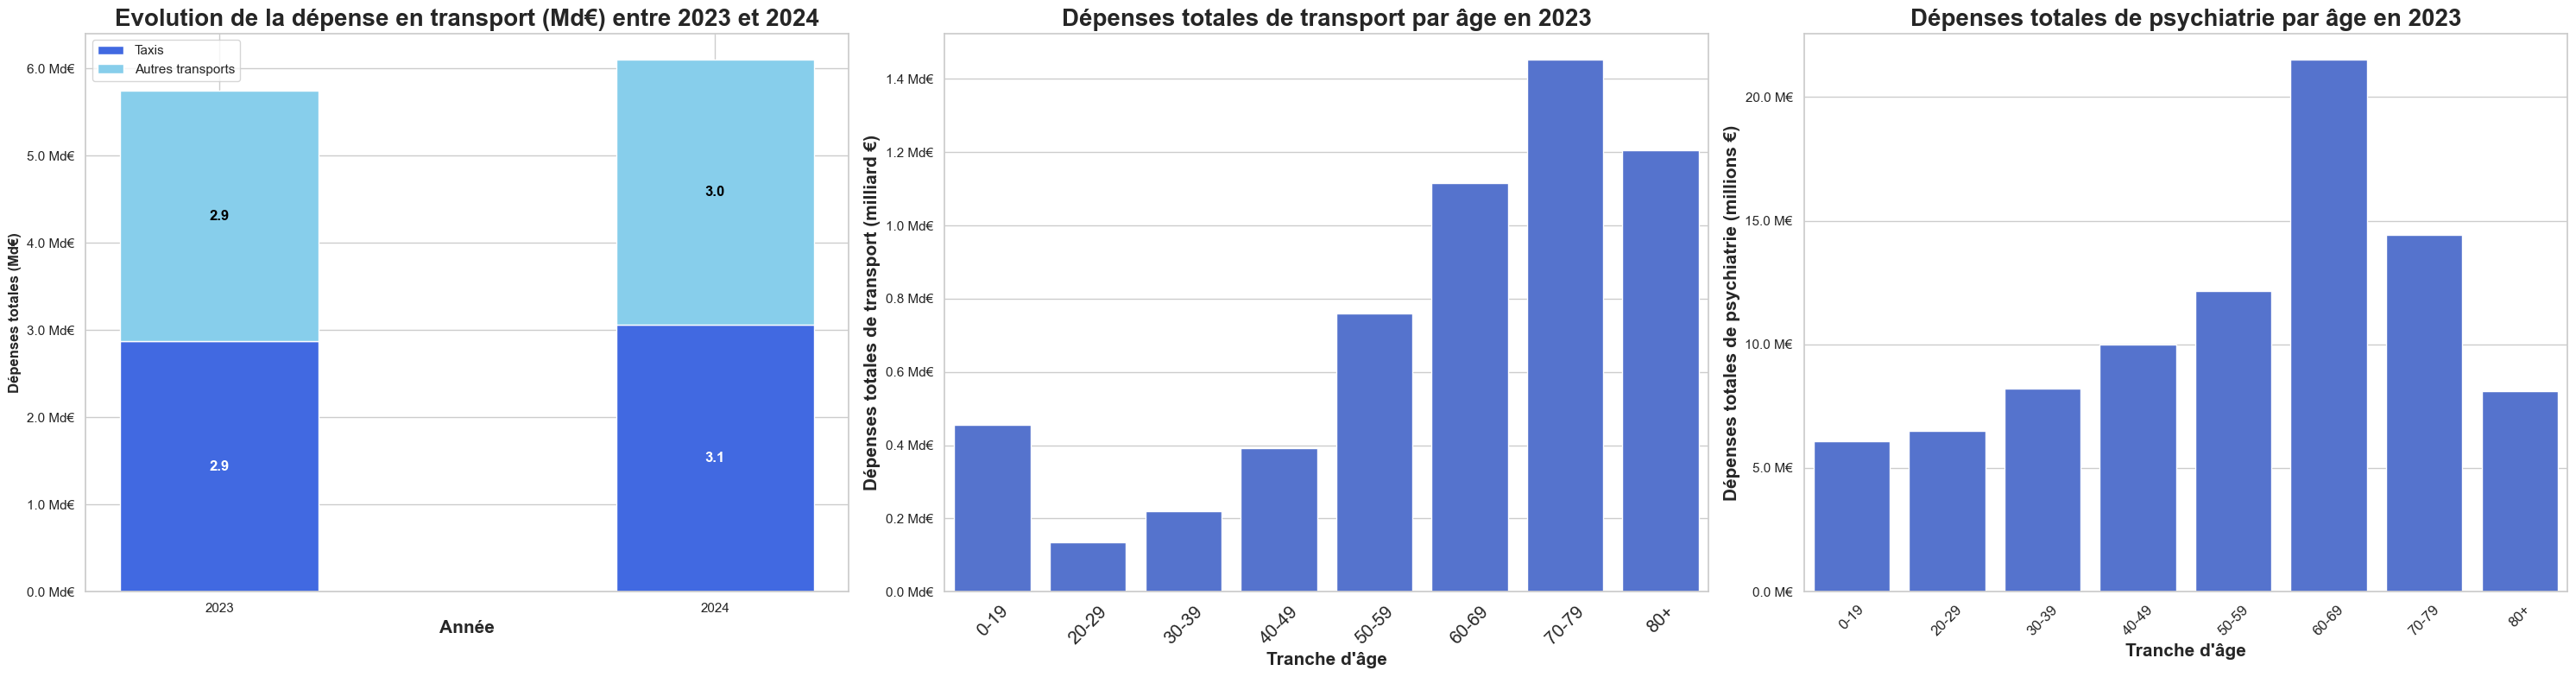

In [199]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Create a 2x2 grid for subplots (we will use only 3)
fig, axs = plt.subplots(1, 3, figsize=(30, 8))

# First plot: Stacked bar plot
x = ['2023', '2024']
y = [dépense_total_taxis_2023, dépense_total_taxis_2024]
z = [dépense_total_autres_transport_2023, dépense_total_autres_transport_2024]
width = 0.4  # Increase width to 0.4 for both bars

bars1 = axs[0].bar(x, y, color='royalblue', label="Taxis", width=width)
bars2 = axs[0].bar(x, z, bottom=y, color='skyblue', label="Autres transports", width=width)

# Format Y axis
axs[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000_000:.1f} Md€'))
axs[0].set_xlabel("Année", fontsize= 15, fontweight='bold')
axs[0].set_ylabel("Dépenses totales (Md€)", fontweight='bold')
axs[0].set_title("Evolution de la dépense en transport (Md€) entre 2023 et 2024", fontsize = 20,fontweight='bold')

# Add annotations on bars
for i in range(len(x)):
    axs[0].text(i, y[i] / 2, f'{y[i] / 1_000_000_000:.1f}', 
                    ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    axs[0].text(i, y[i] + z[i] / 2, f'{z[i] / 1_000_000_000:.1f}', 
                    ha='center', va='center', color='black', fontsize=12, fontweight='bold')

# Add legend
axs[0].legend(loc='upper left')

# Second plot: Barplot for transport expenses by age
sns.set_theme(style="whitegrid")
sns.barplot(x='AGE_BEN_SNDS', 
            y='Dépenses totales transport', 
            data=dépenses_totales_transport_par_age_2023, 
            color="royalblue", ax=axs[1])

# Add title, labels, and formatting for the second plot
axs[1].set_title('Dépenses totales de transport par âge en 2023', fontsize=20, fontweight = 'bold')
axs[1].set_xlabel("Tranche d'âge", fontsize=15, fontweight='bold')
axs[1].set_ylabel('Dépenses totales de transport (milliard €)', fontsize=15, fontweight = 'bold')
axs[1].set_xticks(range(0, 8))
axs[1].set_xticklabels(["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"], rotation=45, fontsize=15)
axs[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000_000:.1f} Md€'))

# Third plot: Barplot for psychiatry expenses by age
sns.barplot(x='AGE_BEN_SNDS', 
            y='Dépenses totales psychiatrie', 
            data=dépenses_totales_psy_par_age_2023, 
            color="royalblue", ax=axs[2])

# Add title, labels, and formatting for the third plot
axs[2].set_title('Dépenses totales de psychiatrie par âge en 2023', fontsize=20,fontweight='bold')
axs[2].set_xlabel("Tranche d'âge", fontsize=15, fontweight='bold')
axs[2].set_ylabel('Dépenses totales de psychiatrie (millions €)', fontsize=15, fontweight='bold')
axs[2].set_xticks(range(0, 8))
axs[2].set_xticklabels(["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"], rotation=45, fontsize=12)
axs[2].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f} M€'))

# Adjust layout to avoid overlap and show the plot
plt.tight_layout()
plt.show()


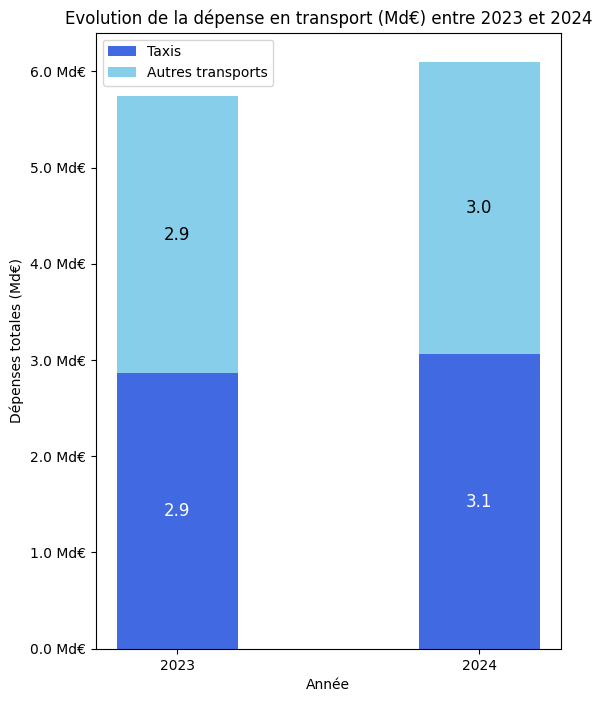

In [ ]:
# Données
x = ['2023', '2024']
y = [dépense_total_taxis_2023, dépense_total_taxis_2024]
z = [dépense_total_autres_transport_2023, dépense_total_autres_transport_2023]

# Création du graphique empilé
fig, ax = plt.subplots(figsize=(6, 8))

# Adjust width to make the bars closer
width = 0.4  # Increase width to 0.4 for both bars

bars1 = ax.bar(x, y, color='royalblue', label="Taxis", width=width)
bars2 = ax.bar(x, z, bottom=y, color='skyblue', label="Autres transports", width=width)

# Format des valeurs sur l'axe Y en millions €
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000_000:.1f} Md€'))

# Ajout du titre et des labels
plt.xlabel("Année")
plt.ylabel("Dépenses totales (Md€)")
plt.title("Evolution de la dépense en transport (Md€) entre 2023 et 2024")

# Ajout des annotations (montants sur les barres)
for i in range(len(x)):
    # Texte sur la partie "Taxis"
    plt.text(i, y[i] / 2, f'{y[i] / 1_000_000_000:.1f}', 
             ha='center', va='center', color='white', fontsize=12)

    # Texte sur la partie "Autres transports"
    plt.text(i, y[i] + z[i] / 2, f'{z[i] / 1_000_000_000:.1f}', 
             ha='center', va='center', color='black', fontsize=12)

# Ajout de la légende dans le coin supérieur gauche
plt.legend(loc='upper left')

# Affichage du graphique
plt.show()

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(20, 10))

# Création du barplot avec les valeurs en millions
sns.barplot(x='AGE_BEN_SNDS', 
            y='Dépenses totales transport', 
            data=dépenses_totales_transport_par_age_2023, 
            color="royalblue")

# Ajout du titre et des labels
plt.title('Dépenses totales de transport par âge en 2023', fontsize=20, fontweight='bold')
plt.xlabel("Tranche d'âge", fontsize=15, fontweight='bold')
plt.ylabel('Dépenses totales de transport (millions €)', fontsize=15, fontweight='bold')

# Changer les noms des tranches d'âge
plt.xticks(ticks=range(0, 8), 
           labels=["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"], 
           rotation=45, fontsize=15)

# Format des valeurs monétaires en millions d'euros sur l'axe Y
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000_000:.1f} Md€'))
plt.savefig("./dépenses en transport par tranches d'âges")
plt.show()

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(20, 10))

# Création du barplot avec les valeurs en millions
sns.barplot(x='AGE_BEN_SNDS', 
            y='Dépenses totales psychiatrie', 
            data=dépenses_totales_psy_par_age_2023, 
            color="royalblue")

# Ajout du titre et des labels
plt.title('Dépenses totales de psychiatrie par âge en 2023', fontsize=16)
plt.xlabel("Tranche d'âge", fontsize=14)
plt.ylabel('Dépenses totales de psychiatrie (millions €)', fontsize=14)

# Changer les noms des tranches d'âge
plt.xticks(ticks=range(0, 8), 
           labels=["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"], 
           rotation=45, fontsize=12)

# Format des valeurs monétaires en millions d'euros sur l'axe Y
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f} M€'))

plt.show() 